# <b> Final Project - Glassman Yair, Vanelli Martina </b>
<h2 style="color:#C40233"> <b> CS236605: Deep Learning </b> </h2>

## <b> Adversarial Attacks on Neural Networks for Graph data </b>
#### <i> Daniel Zügner, Amir Akbarnejad, Stephan Günnemann </i> - 12 June 2018

<h3 style="color:#C40233"> <b> Semi-supervised node classification task </b> </h3>

The authors considered a semi-supervised node classification task in a single large graph having <b> binary node features </b>. Formally, let $G=(A,X)$ be an attributed graph with $A\in \{0,1\}^{n\ \times\  n}$ representing the connections (adjacency matrix) and $X\in \{0,1\}^{n \ \times \ D}$ representing the nodes’ features. Given a subset $\mathcal{V}_L\subseteq \mathcal{V}=\{1,\dots,n\}$ of labeled nodes with class labels from $C=\{1,2,...,c_K\}$, the aim of node classification is to learn a function $g:\mathcal{V}\rightarrow C$ that labels each node to one class.
 

<h3 style="color:#C40233">  <b> GCN model </b> </h3>

The authors focused on node classification employing <b> graph convolution layers </b>. In particular, they considered the model proposed in [Semi-supervised classification with graph convolutional networks](https://arxiv.org/pdf/1609.02907.pdf) and they built a GCN with a single hidden layer with the following structure:
$$
Z=f_0(A,X)=\text{softmax}(\hat{A}\sigma(\hat{A}XW^{(1)})W^{(2)})
$$
where $\hat{A}=\tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{\frac{1}{2}}$, $\tilde{A}=A+I$, $\tilde{D}=\sum_j \tilde{A}_{jj}$, $\sigma(\cdot)=\text{ReLU}(\cdot)$.
The output $Z_{vc}$ denotes the probability of assigning node $v$ to class $c$.

The optimal parameters $\theta=\{W^{(1)}, W^{(2)}\}$ are learned by minimizing <b> cross-entropy </b> on the output of the labeled samples $\mathcal{V}_L$. After training, $Z$ denotes the class probabilities for every instance in the graph.

<h3 style="color:#C40233"> <b> The attack definition </b> </h3>

Given the previous node classification setting, the goal of the authors was to attack a specific <b>target node</b> $v_0\in \mathcal{V}$ by performing small perturbations on the graph $G=(A, X)$ in order to generate a corrupted graph $G'=(A',X')$ 
where $v_0$'s prediction changes and the classification performance drops.

Changes to $A$ are called <font color=#C40233>structure attacks</font>, while changes to $X$ are called <font color=#C40233>feature attacks</font>.

The perturbations on $G$ are constrained to a set of <font color=#C40233>attacker nodes</font> $\mathcal{A} \subseteq \mathcal{V}$, namely 
$$
X′_{ui}\neq X_{ui}\Rightarrow u\in \mathcal{A} \text{, } A′_{uv}\neq A_{uv} \Rightarrow u\in \mathcal{A}\vee v \in \mathcal{A}
$$
If the target $v_0\notin A$, we are dealing with an <font color=#C40233>influencer attack</font> since $v_0$ cannot be manipulated directly, but only indirectly via some influencers. If ${v_0}=A$, it is called a <font color=#C40233>direct attack</font>.

They set a budget $\Delta$ that limits the number of allowed changes:
$$
\sum_u \sum_i |X_{ui}−X′_{ui}|+\sum_{u<v}|A_{uv}−A′_{uv}| \leq \Delta
$$

Moreover, in order to have <b>unnoticeable perturbations</b>, the authors set two more constraints (that are described in detail in the paper):
- They guaranteed to generate perturbations that preserve the <b>degree distribution</b> of the original graph through a statistical test.
- They also managed to preserve the feature statistics through a test based on <b>feature co-occurrences</b>.



<h3 style="color:#C40233"> <b> The optimization problem </b> </h3>

We recall that the authors aimed to solve the following discrete optimization problem. 

<b>Problem.</b> Given a graph $G=(A,X)$, a target node $v_0$ and attacker nodes $\mathcal{A}$. Let $c_{old}$ denote the class for $v_0$ based on the graph $G$ (predicted or using some ground truth) and $P^{G^*}_{\Delta,\mathcal{A}}$ be the set of the graphs that respect the constraints based on the set of attackers $\mathcal{A}$, the budget $\Delta$ and the unnoticeable perturbations.<br>
Determine
$$
G'=\text{argmax}_{(A′,X′)\in P^{G^*}_{\Delta,\mathcal{A}}} \text{max}_{c\neq c_{old}} \text{ln}Z^∗_{v_0,c}−\text{ln}Z^∗_{v_0,c_{old}}
$$
subject to $Z^∗=f_{\theta^*}(A′,X′)$ with $\theta^∗=\text{argmin}_\theta L(θ;A′,X′)$.

<b>Note:</b>
In this version of the optimization problem, there is a bi-level optimization problem since $\theta^∗$ is determined based on $A'$ and $X'$ ( <font color=#C40233> poisoning attack </font>) . As a simpler variant, one can also consider an  <font color=#C40233>evasion attack</font> assuming the parameters are static and learned based on the old graph, $\theta^∗=\text{argmin}_\theta L(\theta;A,X)$.

Since solving this problem is highly challenging due to the discreteness of the data and the large number of parameters in $\theta$, the authors proposed a sequential approach where they first attack a surrogate model. They use this as an argument for transferability: indeed, the attack was effective even if it was not based on the attacked model. The authors experimented the attack also against other models. <br> 
The surrogate model is a linearization of the previous model:
$$
Z'=\text{softmax}(\hat{A}\hat{A}XW^{(1)}W^{(2)})=\text{softmax}(\hat{A}^2XW)
$$
The authors chose to solve the new surrogate optimization problem through a greedy algorithm: at each step, they efficiently computed the scores (based on the surrogate loss) for each feasible change in structure or in features in order to find the best attack at the point. This procedure is repeated until the budget $\Delta$ is reached. The algorithm is explained in detail in the paper.

<h3 style="color:#C40233"> <b> Experiments and results </b> </h3>

The authors experimented many type of attacks (direct and influencers attacks, poisoning and evasion attacks, features and structure attacks) on different datasets. The effectiveness of the attacks is tested on different nonlinear models: GCN, Deep Walk and CNC (Column Networks for Collective Classification). They set $\Delta=d_{v_0}+2$ where $d_{v_0}$ is the degree of the attacked node. This choice is based on the fact that node with a higher degree are more difficult to attack. <br>
They obtained interesting results, especially in the case of direct attacks. They compared their attack (NETTACK) to 2 others attacks: Fast Gradient Sign Method (FGSM) that is a direct attack on $v_0$ and RND (attack in which they modify the structure of the graph). In Table 3, they show the fraction of target nodesthat get correctly classified with the different methods and the different attacks. Please refer to the paper for the detailed experiments setting and a more complete summary of the final results.

<img src="image.PNG" alt="Drawing" style="width: 500px;"/>

## <b> The code </b>

#### Requirements:
* `numpy`
* `scipy`
* `scikit-learn`
* `matplotlib`
* `tensorflow`
* `numba`

In [1]:
#from importlib import reload 
from matplotlib import pyplot as plt
%matplotlib inline
from nettack import utils, GCN
from nettack import nettack as ntk
import numpy as np
gpu_id = None # set this to your desired GPU ID if you want to use GPU computations (only for the GCN/surrogate training)
from function_plot import plot

import random
from nettack import sbm
import scipy.sparse as sp

<a id='data'></a>
### Load network, basic setup

To begin with, we load the data from one of the dataset present in the data folder (`citeseer.npz` and `cora.npz`).


In [2]:
#load the data
#_A_obs: adjacency matrix for links (structure)
#_X_obs: features per node  
#_z_obs: label per node
#One can also repeat the experiment with the dataset cora.
dataset='citeseer'
_A_obs, _X_obs, _z_obs = utils.load_npz('data/'+dataset+'.npz')

#make the graph indirected, that is make the adjacency matrix _A_obs symmetric
_A_obs = _A_obs + _A_obs.T 
_A_obs[_A_obs > 1] = 1
    
print_matrix=False
if(print_matrix):
    print(_A_obs)
    
#number of vertices
print("Number of nodes:", _A_obs.shape[0])
print("Number of features:",_X_obs.shape[1])

Number of nodes: 3312
Number of features: 3703


### Data preprocessing


In [3]:
#we select the largest connected component    
lcc = utils.largest_connected_components(_A_obs)
_A_obs = _A_obs[lcc][:,lcc]
_X_obs = _X_obs[lcc].astype('float32')
_z_obs = _z_obs[lcc]

#number of vertices
N = _A_obs.shape[0]
print("Number of nodes in the largest connected component:",N)

assert np.abs(_A_obs - _A_obs.T).sum() == 0, "Input graph is not symmetric"
assert _A_obs.max() == 1 and len(np.unique(_A_obs[_A_obs.nonzero()].A1)) == 1, "Graph must be unweighted"
assert _A_obs.sum(0).A1.min() > 0, "Graph contains singleton nodes"

Selecting 1 largest connected components
Number of nodes in the largest connected component: 2110


In [4]:
#number of labels
_K = _z_obs.max()+1
print("Number of labels:", _K)
_Z_obs = np.eye(_K)[_z_obs]
#the authors compute the matrix _A_hat that is used in the GCN model described above
_An = utils.preprocess_graph(_A_obs)

Number of labels: 6


In [5]:
#since we are dealing with a semi-supervised node classification task, we assume that 
#just a set V_l of the vertices is labeled. 
#For this reason, even though in our datasets all the labels are known, 
#the set of nodes is randomly divided in labeled nodes (V_l) 
#and unlabeled nodes (the rest of the nodes).
#The labeled set of nodes is then divided in train set and validation set
seed = 15

unlabeled_share = 0.8
val_share = 0.1
train_share = 1 - unlabeled_share - val_share
np.random.seed(seed)
split_train, split_val, split_unlabeled = utils.train_val_test_split_tabular(np.arange(N),
                                                                       train_size=train_share,
                                                                       val_size=val_share,
                                                                       test_size=unlabeled_share,
                                                                       stratify=_z_obs)

### Choose the node to attack

In order to see significant results, we choose to attack a node with at least a `set_deg` degree.

In [6]:
set_deg=10

In [7]:
#degrees and neighbors
neighbors=[]
degrees=np.zeros(N)
for i in range(N):
    neighbors.append(_A_obs[i].nonzero()[1])
    degrees[i]=len(neighbors[i])

In [9]:
vertices=np.array(range(N))
u = random.choice(vertices[degrees==set_deg]) # node to attack 
#the authors attack unlabeled nodes, since in the problem definition the goal of the
#semi supervised learning is to predict the unlabeled nodes from the features, 
#the structure and the labeled ones
#run this part until the condition is verified
assert u in split_unlabeled
print("Attacked node:",u)
deg=degrees[u]

Attacked node: 2068


### Train surrogate model
Since we focus on the poisoning attacks, we train the surrogate model once in order to find the optimal parameters $W_1$ and $W_2$ that we pass them as inputs to Nettack.

In [10]:
sizes = [16, _K]
verbose=True

In [11]:
surrogate_model = GCN.GCN(sizes, _An, _X_obs, with_relu=False, name="surrogate", gpu_id=gpu_id)
surrogate_model.train(split_train, split_val, _Z_obs, print_info=verbose)
W1 =surrogate_model.W1.eval(session=surrogate_model.session)
W2 =surrogate_model.W2.eval(session=surrogate_model.session)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.


C:\Users\Martina\Anaconda3\envs\project\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


converged after 36 iterations


### Set up Nettack


In [12]:
nettack = ntk.Nettack(_A_obs, _X_obs, _z_obs, W1, W2, u, verbose)

### Poison the data


In [13]:
#we focus on direct attacks
direct_attack = True
n_influencers = 1 if direct_attack else 5
#we focus on structure attacks
perturb_features = False    
perturb_structure = True

In [14]:
#we decided to set the number of perturbations as degree/2
n_perturbations = int(degrees[u]/2) 

In [15]:
nettack.reset()
nettack.attack_surrogate(n_perturbations, perturb_structure=perturb_structure, perturb_features=perturb_features, direct=direct_attack, n_influencers=n_influencers)
 

##### Starting attack #####
##### Attack only using structure perturbations #####
##### Attacking the node directly #####
##### Performing 5 perturbations #####
##### ...1/5 perturbations ... #####
##### ...2/5 perturbations ... #####
##### ...3/5 perturbations ... #####
##### ...4/5 perturbations ... #####
##### ...5/5 perturbations ... #####


In [16]:
#Print perturbations
if verbose:
    print("Structure perturbations:",nettack.structure_perturbations)
    print("Features perturbations:", nettack.feature_perturbations)

Structure perturbations: [(2068, 1582), (2068, 88), (2068, 643), (2068, 801), (2068, 1682)]
Features perturbations: [(), (), (), (), ()]


### Train GCN without perturbations


In [17]:
retrain_iters=5
#classification_margins_clean = []
class_distrs_clean = []
gcn_before = GCN.GCN(sizes, _An, _X_obs, "gcn_orig", gpu_id=gpu_id)

C:\Users\Martina\Anaconda3\envs\project\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [18]:
if verbose:
    print("Train GCN without perturbations")
    
for _ in range(retrain_iters):
    if verbose:
        print("... {}/{} ".format(_+1, retrain_iters))
    gcn_before.train(split_train, split_val, _Z_obs, print_info=verbose)
    probs_before_attack = gcn_before.predictions.eval(session=gcn_before.session,feed_dict={gcn_before.node_ids: [nettack.u]})[0]
    class_distrs_clean.append(probs_before_attack)
    #best_second_class_before = (probs_before_attack - 1000*_Z_obs[nettack.u]).argmax()
    #margin_before = probs_before_attack[_z_obs[nettack.u]] - probs_before_attack[best_second_class_before]
    #classification_margins_clean.append(margin_before)
class_distrs_clean = np.array(class_distrs_clean)

Train GCN without perturbations
... 1/5 


C:\Users\Martina\Anaconda3\envs\project\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


converged after 39 iterations
... 2/5 
converged after 46 iterations
... 3/5 
converged after 36 iterations
... 4/5 
converged after 40 iterations
... 5/5 
converged after 77 iterations


### Train GCN with perturbations


In [19]:
#classification_margins_corrupted = []
class_distrs_retrain = []

#this time we use nettack.adj_preprocessed and nettack.X_obs.tocsr(), that are the attacked adjacency matrix and features 
gcn_retrain = GCN.GCN(sizes, nettack.adj_preprocessed, nettack.X_obs.tocsr(), "gcn_retrain", gpu_id=gpu_id)

In [20]:
if verbose:
    print("Train GCN with perturbations")
for _ in range(retrain_iters):
    if verbose:    
        print("... {}/{} ".format(_+1, retrain_iters))
    gcn_retrain.train(split_train, split_val, _Z_obs, print_info=verbose)
    probs_after_attack = gcn_retrain.predictions.eval(session=gcn_retrain.session,feed_dict={gcn_retrain.node_ids: [nettack.u]})[0]
    class_distrs_retrain.append(probs_after_attack)
    #best_second_class_after = (probs_after_attack - 1000*_Z_obs[nettack.u]).argmax()
    #margin_after = probs_after_attack[_z_obs[nettack.u]] - probs_after_attack[best_second_class_after]
    #classification_margins_corrupted.append(margin_after)
class_distrs_retrain = np.array(class_distrs_retrain)
    

Train GCN with perturbations
... 1/5 
converged after 45 iterations
... 2/5 
converged after 46 iterations
... 3/5 
converged after 51 iterations
... 4/5 
converged after 39 iterations
... 5/5 
converged after 54 iterations


### Visualize the results

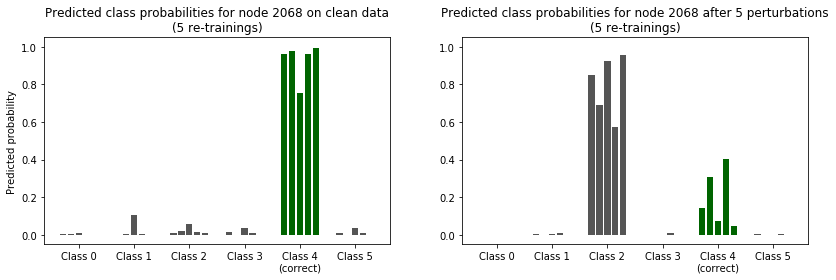

In [21]:
plot(class_distrs_clean, class_distrs_retrain, retrain_iters, nettack.u, nettack.label_u, _K, n_perturbations)
#clean, attacked = test_nettack(_A_obs, _X_obs, _z_obs, u,  n_perturbations, perturb_structure, perturb_features, direct_attack, n_influencers, 
#             split_train, split_val, split_unlabeled, verbose=False)
